<a href="https://colab.research.google.com/github/boxty123/SoThat-NLP/blob/main/SBerts_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문장 0: 가격 대비 성능이 정말 좋아요! → 클러스터 0
문장 1: 이 정도 가격이면 훌륭한 선택 같아요. → 클러스터 0
문장 2: 가성비 최고입니다. 만족스러워요. → 클러스터 0
문장 3: 좀 비싸지만 성능이 괜찮네요. → 클러스터 0
문장 4: 디자인이 너무 세련되고 예뻐요. → 클러스터 2
문장 5: 가격이 너무 비싸서 고민되네요. → 클러스터 4
문장 6: 이 정도 성능에 이 가격이면 괜찮은 듯. → 클러스터 0
문장 7: 성능이 기대 이하여서 좀 아쉬워요. → 클러스터 0
문장 8: 배터리 수명이 너무 짧아요... → 클러스터 3
문장 9: 디자인이 깔끔하고 고급스러워 보이네요. → 클러스터 2
문장 10: 가격이 좀만 더 저렴했으면 좋겠어요. → 클러스터 4
문장 11: 성능이 빠릿빠릿하고 좋네요! → 클러스터 0
문장 12: 디자인이 마음에 드는데 성능은 보통이네요. → 클러스터 1
문장 13: 발열이 좀 심한 편이네요. → 클러스터 1
문장 14: 이 정도면 가격 대비 충분한 성능이에요. → 클러스터 0
문장 15: 너무 싸서 걱정했는데 의외로 괜찮아요. → 클러스터 4
문장 16: 디자인이 심플하고 무난한 느낌이에요. → 클러스터 1
문장 17: 화면 밝기가 너무 어두워서 별로네요. → 클러스터 1
문장 18: 가격이 좀 높은데 성능은 확실히 좋아요. → 클러스터 0
문장 19: 디자인이 투박해서 별로예요. → 클러스터 1
문장 20: 가성비는 좋은데 내구성이 아쉬워요. → 클러스터 3
문장 21: 소음이 심해서 사용하기 불편해요. → 클러스터 1
문장 22: 성능이 뛰어나지만 가격이 부담되네요. → 클러스터 0
문장 23: 이 가격에 이런 성능이라니 만족스럽네요. → 클러스터 0
문장 24: 화면이 크고 선명해서 마음에 들어요. → 클러스터 2
문장 25: 이전 모델보다 확실히 성능이 개선됐어요. → 클러스터 0
문장 26: 고급스럽지만 가격이 너무 비싸요. → 클러스터 4
문장 27: 디자인은 예쁘지만 실용성은 떨어지네요. → 클러스터

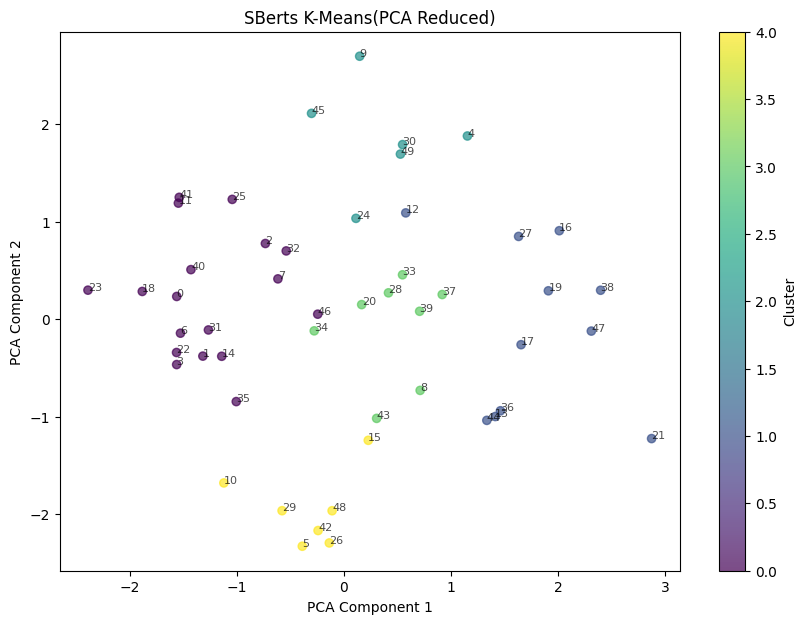

In [ ]:
!pip install sentence_transformers
from sklearn.cluster import KMeans
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# === 사용 예시 ===
sentences = [
    "가격 대비 성능이 정말 좋아요!",
    "이 정도 가격이면 훌륭한 선택 같아요.",
    "가성비 최고입니다. 만족스러워요.",
    "좀 비싸지만 성능이 괜찮네요.",
    "디자인이 너무 세련되고 예뻐요.",
    "가격이 너무 비싸서 고민되네요.",
    "이 정도 성능에 이 가격이면 괜찮은 듯.",
    "성능이 기대 이하여서 좀 아쉬워요.",
    "배터리 수명이 너무 짧아요...",
    "디자인이 깔끔하고 고급스러워 보이네요.",
    "가격이 좀만 더 저렴했으면 좋겠어요.",
    "성능이 빠릿빠릿하고 좋네요!",
    "디자인이 마음에 드는데 성능은 보통이네요.",
    "발열이 좀 심한 편이네요.",
    "이 정도면 가격 대비 충분한 성능이에요.",
    "너무 싸서 걱정했는데 의외로 괜찮아요.",
    "디자인이 심플하고 무난한 느낌이에요.",
    "화면 밝기가 너무 어두워서 별로네요.",
    "가격이 좀 높은데 성능은 확실히 좋아요.",
    "디자인이 투박해서 별로예요.",
    "가성비는 좋은데 내구성이 아쉬워요.",
    "소음이 심해서 사용하기 불편해요.",
    "성능이 뛰어나지만 가격이 부담되네요.",
    "이 가격에 이런 성능이라니 만족스럽네요.",
    "화면이 크고 선명해서 마음에 들어요.",
    "이전 모델보다 확실히 성능이 개선됐어요.",
    "고급스럽지만 가격이 너무 비싸요.",
    "디자인은 예쁘지만 실용성은 떨어지네요.",
    "소프트웨어 최적화가 좀 아쉬워요.",
    "가격이 내려가면 구매할 의향 있어요.",
    "디자인이 예쁜데 스크래치가 잘 생겨요.",
    "가격이 싸서 기대 안 했는데 성능이 괜찮아요.",
    "발열도 없고 성능이 상당히 좋아요.",
    "조작이 쉬워서 누구나 사용하기 편할 듯해요.",
    "성능이 좋긴 한데 배터리가 빨리 닳아요.",
    "이 가격이면 이 정도 성능은 기본 아닌가요?",
    "크기가 너무 커서 휴대성이 떨어지네요.",
    "소음이 적고 조용하게 작동하네요.",
    "디자인이 너무 독특해서 호불호 갈릴 듯해요.",
    "화면 주사율이 높아서 부드러워요!",
    "성능은 뛰어난데 무게가 좀 있어요.",
    "이 정도 성능이면 충분히 만족스러워요.",
    "가격이 더 저렴했으면 대박인데 아쉽네요.",
    "배터리가 오래가서 여행할 때 좋겠어요.",
    "조립이 좀 어려운 편이네요.",
    "디자인과 성능 모두 만족스럽습니다!",
    "가성비는 좋은데 브랜드가 좀 아쉬워요.",
    "디자인이 너무 투박해서 별로예요.",
    "가격 대비 성능이 부족한 느낌이에요.",
    "이전 모델보다 디자인이 확실히 예뻐졌네요."
]

# SBERT 모델 로드
sbert_model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# 문장 벡터화
sentence_embeddings = sbert_model.encode(sentences)

# K-Means 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(sentence_embeddings)

# 클러스터링 결과 출력
for i, label in enumerate(kmeans.labels_):
    print(f"문장 {i}: {sentences[i]} → 클러스터 {label}")

# PCA를 사용해 2차원으로 차원 축소
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(sentence_embeddings)

# 시각화
plt.figure(figsize=(10, 7))
scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label="Cluster")
plt.title("SBerts K-Means(PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

# 문장 텍스트 추가
for i, txt in enumerate(sentences):
    plt.annotate(i, (reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=8, alpha=0.7)

plt.show()
